In [1]:
 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("D:\data\images"))

# Any results you write to the current directory are saved as output.


['images', 'test', 'train', 'val']


In [2]:
train_messy = "D:/data/images/train/messy"
train_clean= "D:/data/images/train/clean"
test_messy= "D:/data/images/val/messy"
test_clean= "D:/data/images/val/clean"
image_size = 128

# A MESSY ROOM


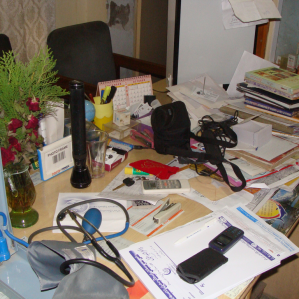

In [3]:
Image.open("D:/data/images/train/messy/73.png")

# A CLEAN ROOM

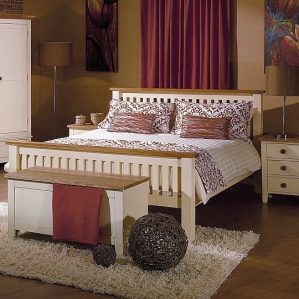

In [4]:
Image.open("D:/data/images/train/clean/73.png")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 526.49it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

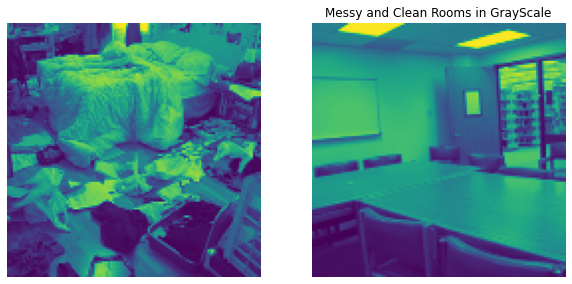

In [5]:
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

In [6]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [7]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [8]:
train_data = train_data() 
test_data = test_data()


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 408.49it/s]


In [9]:
x_data=np.concatenate((train_data,test_data),axis=0)
print(np.min(x_data))
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

0


In [10]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [15]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [16]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (212, 128, 128)
Y shape:  (212, 1)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]
x_train.shape

(180, 128, 128)

In [18]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (180, 16384)
X test flatten (32, 16384)


In [19]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 180)
x test:  (16384, 32)
y train:  (1, 180)
y test:  (1, 32)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train.T,y_train.T)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid=({'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2']},))

In [21]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.961111111111111


In [22]:
log_reg= LogisticRegression(C=1,penalty="l2")
log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 1.0 
train accuracy: 1.0 


# SKLEARN SIMPLE

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [25]:
x_train = x_train_flatten
x_test = x_test_flatten
y_test = y_test.T
y_train = y_train.T

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((180, 16384), (180, 1), (32, 16384), (32, 1))

In [26]:
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
model.score(x_test, y_test)

0.90625

In [28]:
model.predict(x_test[:5])

array([1., 0., 0., 1., 1.])

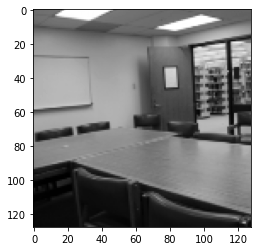

In [29]:
plt.imshow(x_test[1].reshape(128, 128), cmap='gray')